In [1]:
# markdown = """\
# - [g] Goal
#   - [q] What should we do?
#     - [a] Alternative 1 ^alt1
#     - [a] Alternative 2 ^alt2
#     - [D] Decision: A1 [[#^alt1]]
# """


# markdown = """\
# - [g] Add syntax highlighting for Cannonball markdown ^feature3
# 	- [?] Which **library** should we use for highlighting? ^q1
# 		- [a] Use Prism.js ^alt1
# 			- [o] Has good React integration
# 			- [P] May need custom language definition
# 				- [ ] Research custom grammar in Prism
# 		- [a] Use highlight.js ^alt2
# 			- [o] More lightweight
# 			- [o] Easier to customize
# 		- [D] Selected [[#^alt2]]
# """

markdown = """\
- [g] Add syntax highlighting for Cannonball markdown ^feature3
	- [?] Which **library** should we use for highlighting? ^q1
		- [a] Use Prism.js ^alt1
			- [o] Has good React integration
			- [P] May need custom language definition
				- [ ] Research custom grammar in Prism
		- [a] Use highlight.js ^alt2
			- [o] More lightweight
			- [o] Easier to customize
		- [D] Selected [[#^alt2]]
	- [ ] Implement syntax highlighting component
		- This will be a React component
		- [/] Create basic highlighter class
			- [ ] Add custom rules for node types
			- [ ] Connect to rendering pipeline
		- [I] Could add visual indicators for different node states
		- [ ] Write tests for highlighting edge cases
"""

# with open("../assets/example_graph.md", "r") as f:
#     markdown = f.read()

In [2]:
from cannonball.graph_mgr import GraphMgr
from pprint import pprint

mgr = GraphMgr.from_markdown(markdown)
print(mgr.to_markdown(indent="\t"))

pprint(mgr.to_dict())

- [g] Add syntax highlighting for Cannonball markdown ^feature3
	- [?] Which **library** should we use for highlighting? ^q1
		- [a] Use Prism.js ^alt1
			- [o] Has good React integration
			- [P] May need custom language definition
				- [ ] Research custom grammar in Prism
		- [a] Use highlight.js ^alt2
			- [o] More lightweight
			- [o] Easier to customize
		- [D] Selected [[#^alt2]]
	- [ ] Implement syntax highlighting component
		- This will be a React component
		- [/] Create basic highlighter class
			- [ ] Add custom rules for node types
			- [ ] Connect to rendering pipeline
		- [I] Could add visual indicators for different node states
		- [ ] Write tests for highlighting edge cases

{'edges': [{'source': Goal([g] Add syntax highlighting for Cannonball markdown ^feature3),
            'target': Question([?] Which **library** should we use for highlighting? ^q1),
            'type': 'requires'},
           {'source': Goal([g] Add syntax highlighting for Cannonball markdown ^fea

In [3]:
def unidiff_output(expected, actual):
    """
    Helper function. Returns a string containing the unified diff of two multiline strings.
    """

    import difflib

    expected = expected.splitlines(1)
    actual = actual.splitlines(1)

    diff = difflib.unified_diff(expected, actual, fromfile="original", tofile="to_markdown()")

    return "".join(diff)


print(unidiff_output(markdown, mgr.to_markdown(indent="\t")))
assert markdown == mgr.to_markdown(indent="\t"), "Markdown output does not match original"

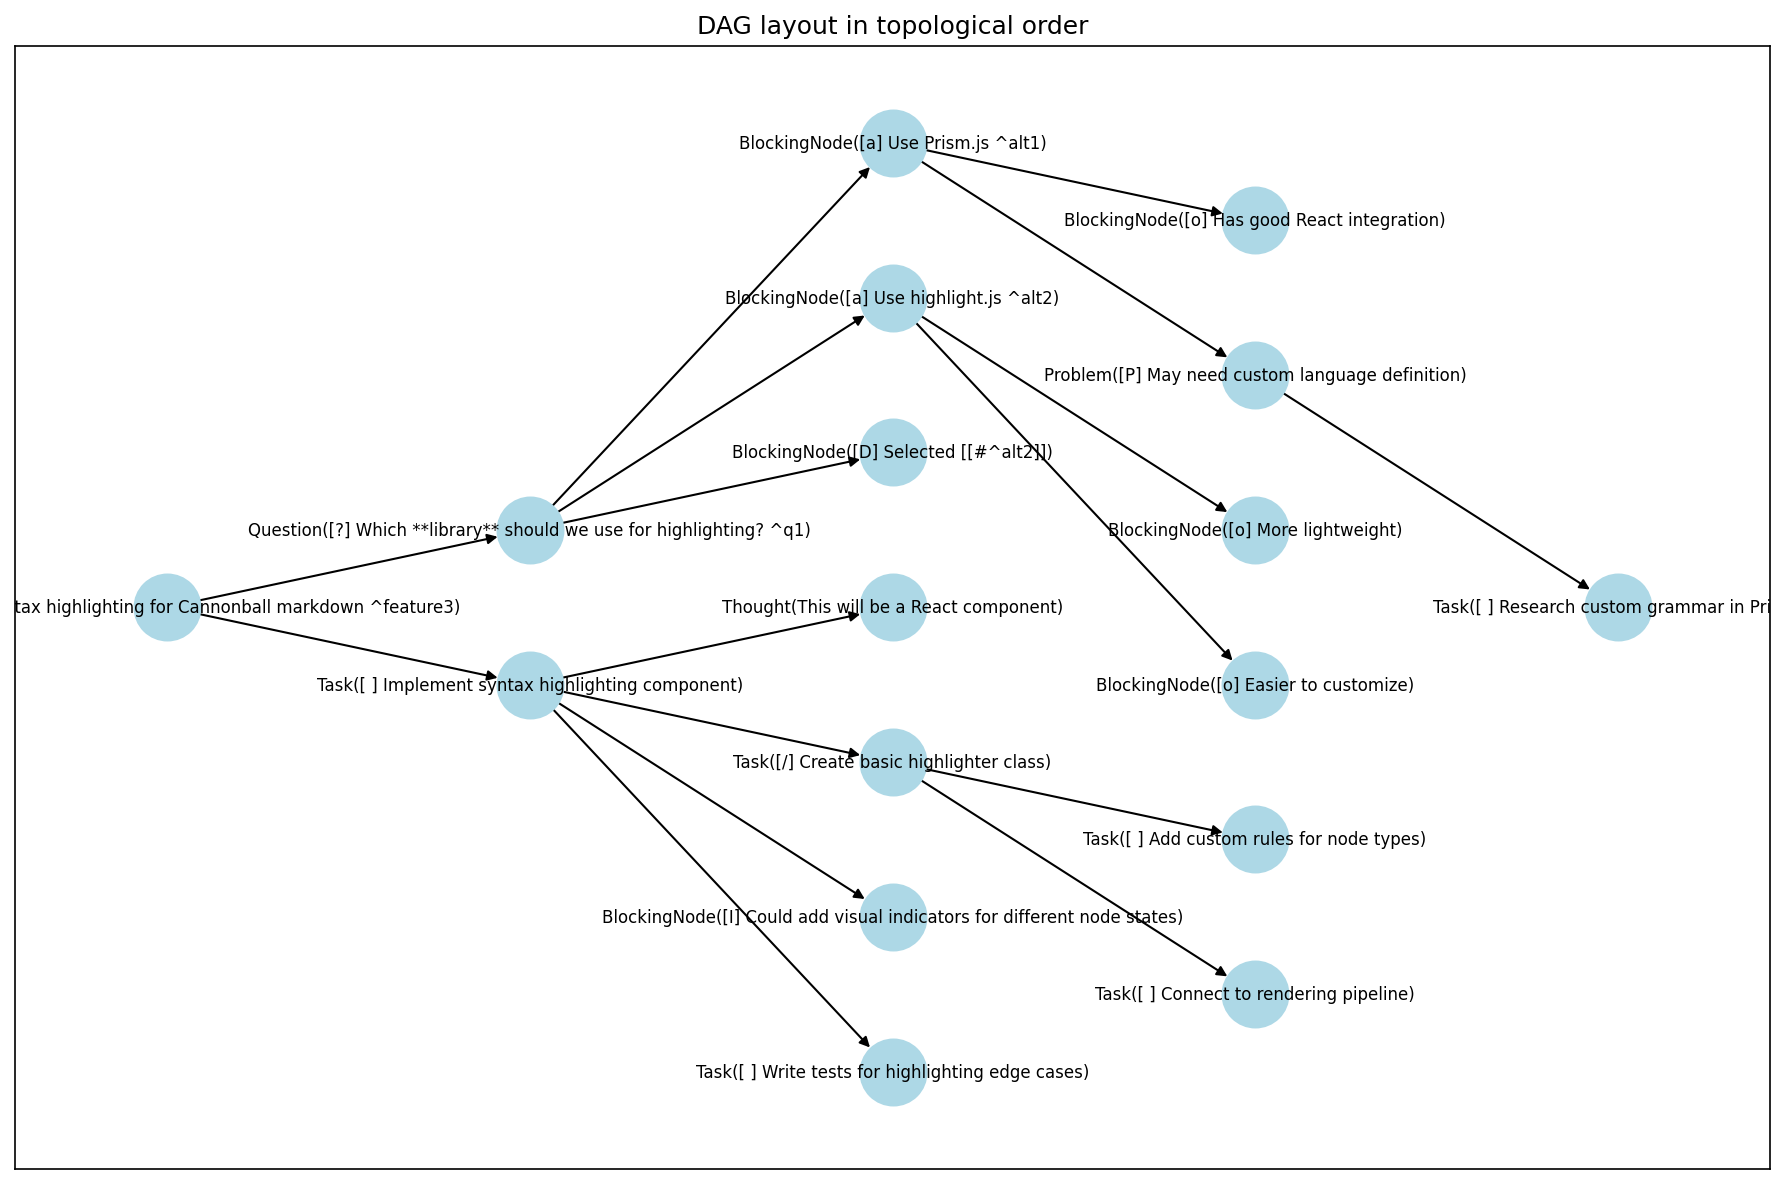

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from cannonball.utils import get_subgraph, EdgeType

G = get_subgraph(mgr.nxgraph, edge_type=EdgeType.REQUIRES)

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

markers = nx.get_node_attributes(G, "marker")
text = nx.get_node_attributes(G, "name")

fig, ax = plt.subplots(figsize=(12, 8), dpi=150, facecolor="white")
nx.draw_networkx(G, pos=pos, ax=ax, node_size=1000, node_color="lightblue", font_size=8)
ax.set_title("DAG layout in topological order")
fig.tight_layout()

# # Get a list of edges with type="requires"
# requires_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get("type") == "requires"]
# # plot edges in red
# nx.draw_networkx_edges(G, pos=pos, edgelist=requires_edges, edge_color="red", width=2)

# # draw edge labels
# edge_labels = nx.get_edge_attributes(G, "type")
# nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, ax=ax, font_size=8)